# F. Regression analyses example

In [1]:
pip install ipython


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns

In [3]:
to_keep = pd.read_csv('DEF_IMMO.csv', sep=',', na_values='None')

In [4]:
to_keep.columns

Index(['Unnamed: 0', 'type_of_property', 'subtype_of_property', 'locality',
       'province', 'région', 'price', 'number_of_facades', 'house_area',
       'house_area_cat', 'number_of_rooms', 'number_of_rooms_cat',
       'surface_of_the_land', 'surface_of_the_land_cat',
       'fully_equipped_kitchen', 'garden', 'garden_area', 'terrace',
       'terrace_area', 'open_fire', 'swimming_pool', 'state_of_the_building',
       'construction_year', 'construction_year_cat'],
      dtype='object')

In [5]:
to_keep.head(3)

,Unnamed: 0,type_of_property,subtype_of_property,locality,province,région,price,number_of_facades,house_area,house_area_cat,...,fully_equipped_kitchen,garden,garden_area,terrace,terrace_area,open_fire,swimming_pool,state_of_the_building,construction_year,construction_year_cat
0,0,house,house,1050,Bruxelles-Capitale,Région Bruxelles-capitale,340000,2.0,203.0,]180-240 m²],...,1,0,NaN,1,NaN,0,0,to be done up,1901.0,1900-1919
1,1,house,villa,1880,Brabant flamand,Région flamande,525000,4.0,250.0,]240m²- ],...,1,1,430.0,1,40.0,0,0,as new,1992.0,1980-1999
2,2,house,exceptional property,4900,Liège,Région wallonne,550000,4.0,475.0,]240m²- ],...,1,1,1400.0,1,NaN,0,0,good,1853.0,older than 1900


## Ligne de regression scipy

In [6]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(to_keep['house_area'],to_keep['price'])

C:\Users\jcmeu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [7]:
def predict(x):
   return slope * x + intercept

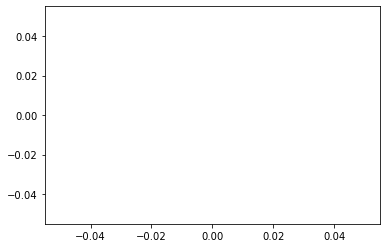

In [8]:
fitLine = predict(to_keep['house_area'])
plt.plot(to_keep['house_area'], fitLine, c='r')

In [9]:
print (predict(100))

nan


## Scatter and regression line using seaborn 

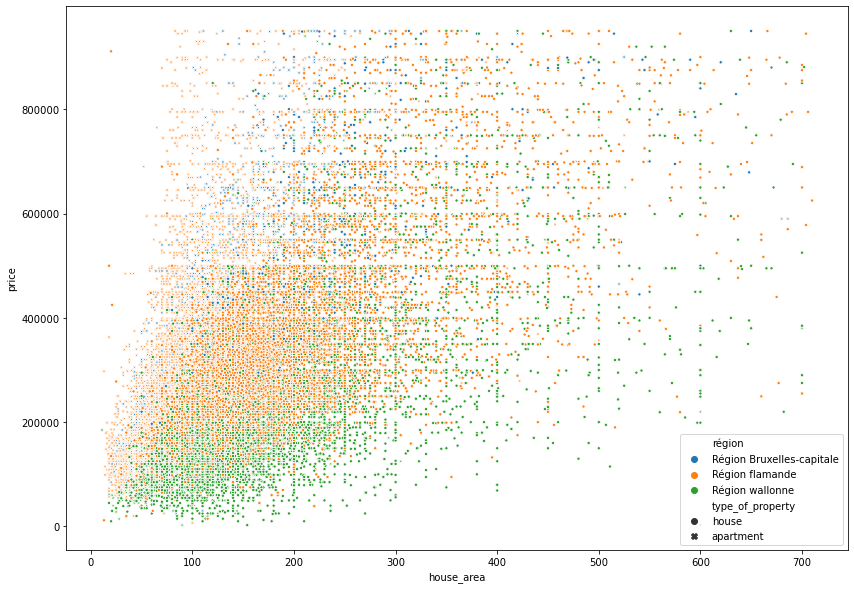

In [10]:
fig = plt.figure(figsize=(14, 10))

sns.scatterplot(x='house_area', y='price', data=to_keep, s=10, hue='région', style='type_of_property', sizes=(20,200)) 

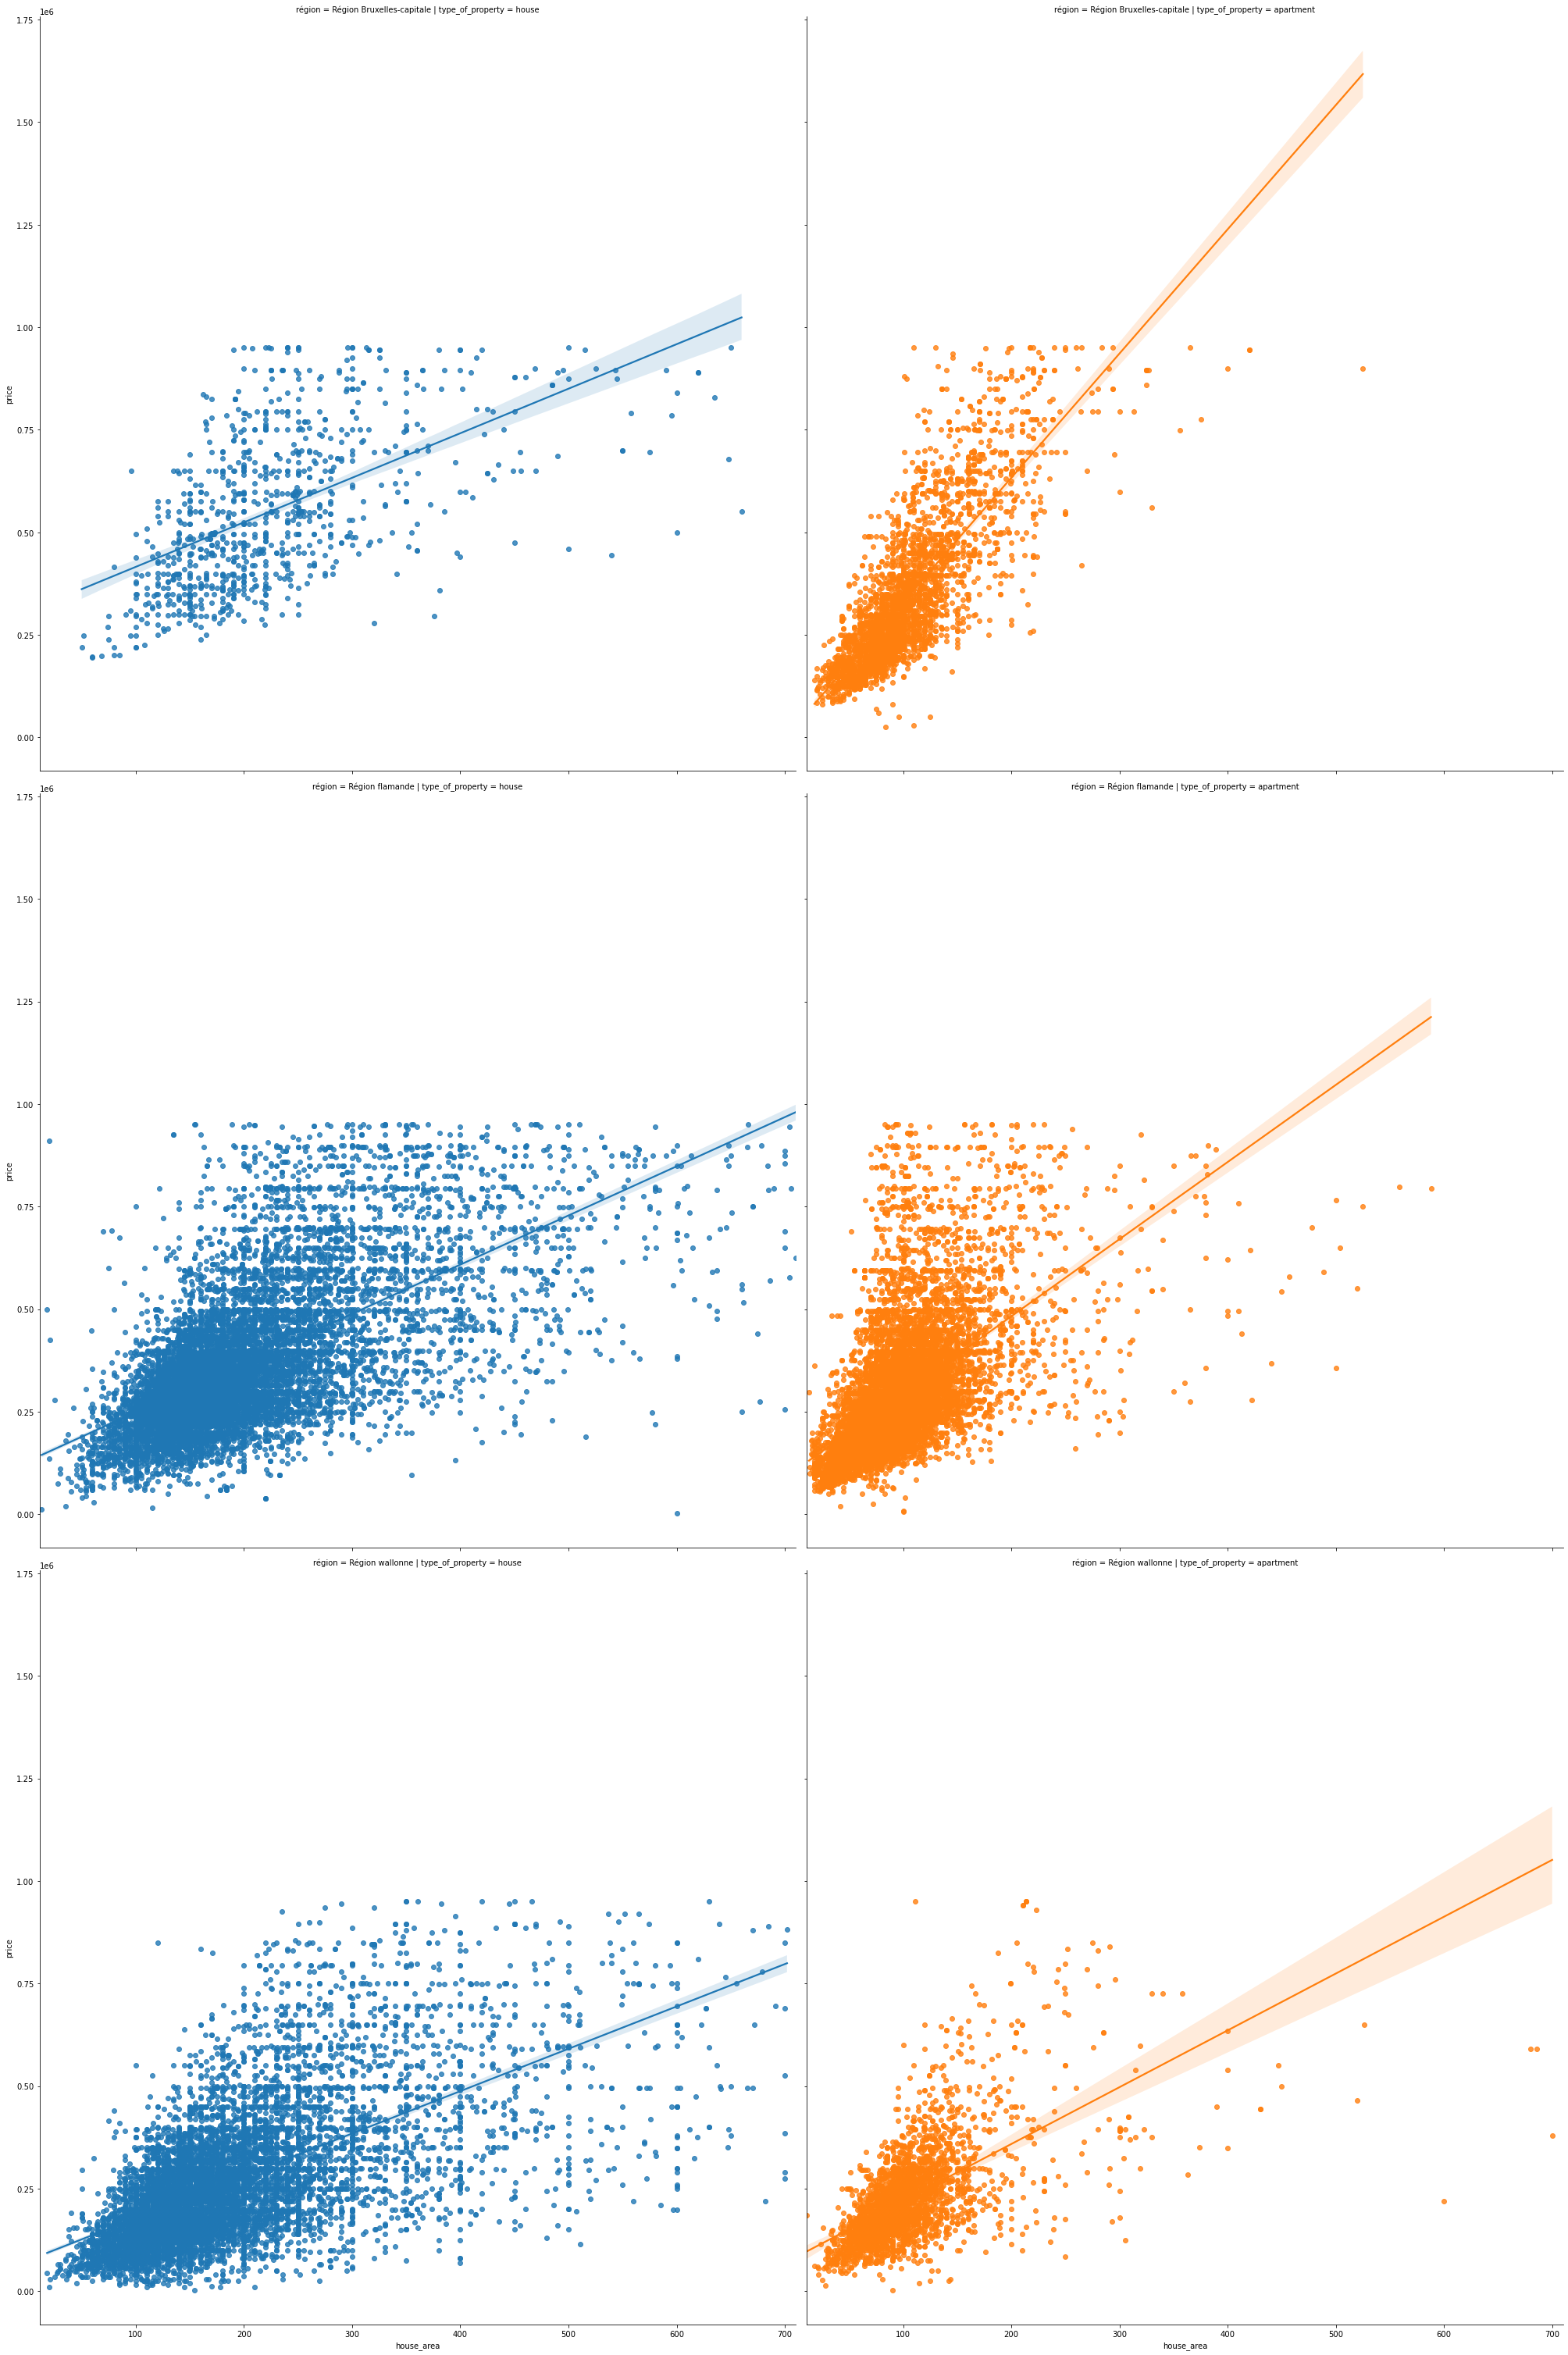

In [11]:
sns.lmplot(x='house_area', y='price', data=to_keep, hue='type_of_property', row='région', col="type_of_property", height=14, aspect =1) 


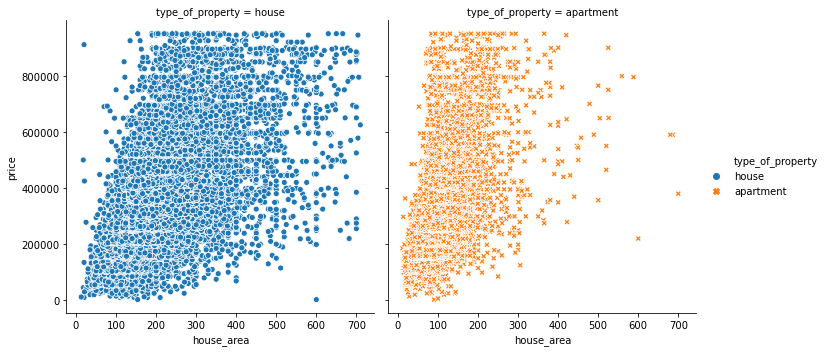

In [12]:
sns.relplot(
    data=to_keep, x="house_area", y="price",
    col="type_of_property", hue="type_of_property", style="type_of_property",
    kind="scatter"
)


## Relation between living space and price as a function of the region 

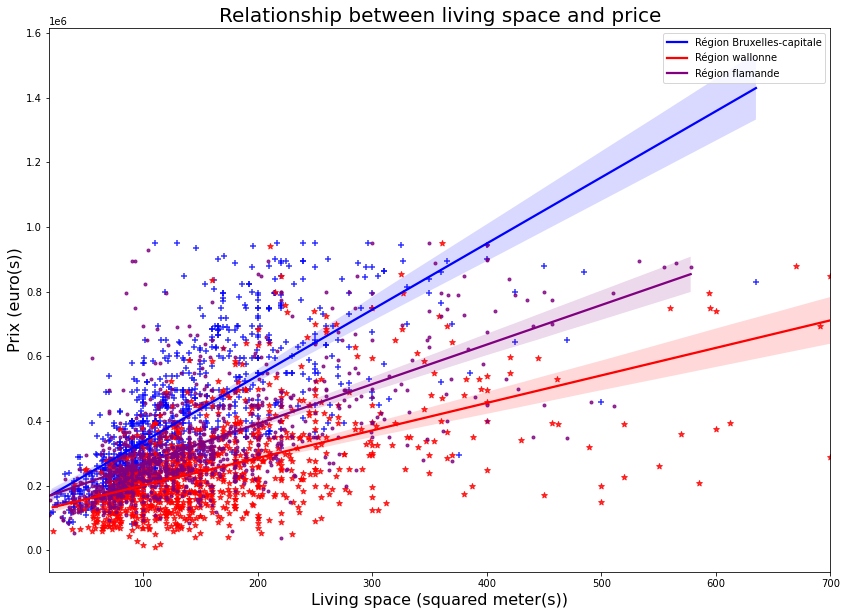

In [13]:
import seaborn as sns

# 1000 random samples
bxl_sample = to_keep[to_keep['région'] == 'Région Bruxelles-capitale'].sample(1000)
wl_sample = to_keep[to_keep['région'] == 'Région wallonne'].sample(1000)
fl_sample = to_keep[to_keep['région'] == 'Région flamande'].sample(1000)

# regression plot using seaborn
fig = plt.figure(figsize=(14, 10))
sns.regplot(x=bxl_sample.house_area, y=bxl_sample.price, color='blue', marker='+')
sns.regplot(x=wl_sample.house_area, y=wl_sample.price, color='red', marker='*')
sns.regplot(x=fl_sample.house_area, y=fl_sample.price, color='purple', marker='.')


# legend, title, and labels.
plt.legend(labels=['Région Bruxelles-capitale', 'Région wallonne', 'Région flamande'])
plt.title('Relationship between living space and price', size=20)
plt.xlabel('Living space (squared meter(s))', size=16)
plt.ylabel('Prix (euro(s))', size=16);


## Relation between living space and price as a function of the type of property

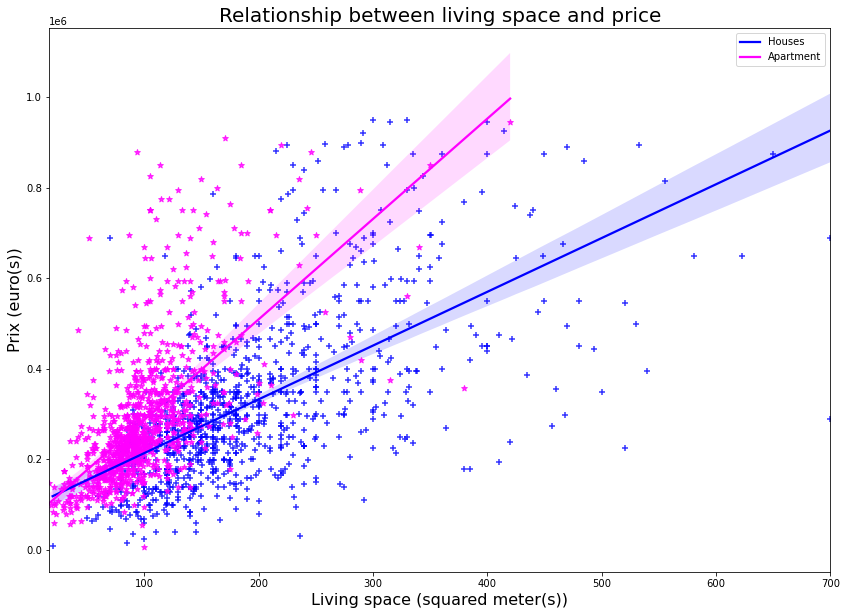

In [14]:
import seaborn as sns

# 1000 random samples
h_sample = to_keep[to_keep['type_of_property'] == 'house'].sample(1000)
a_sample = to_keep[to_keep['type_of_property'] == 'apartment'].sample(1000)

# regression plot using seaborn
fig = plt.figure(figsize=(14, 10))
sns.regplot(x=h_sample.house_area, y=h_sample.price, color='blue', marker='+')
sns.regplot(x=a_sample.house_area, y=a_sample.price, color='magenta', marker='*')


# legend, title, and labels.
plt.legend(labels=['Houses', 'Apartment'])
plt.title('Relationship between living space and price', size=20)
plt.xlabel('Living space (squared meter(s))', size=16)
plt.ylabel('Prix (euro(s))', size=16);


In [15]:
## 

In [16]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [17]:
from IPython import get_ipython


In [18]:
get_ipython().run_line_magic('matplotlib', 'inline')


In [19]:
get_ipython().run_line_magic('matplotlib', 'qt')


In [20]:
from mpl_toolkits.mplot3d import Axes3D

#from matplotlib import interactive
#interactive(True)

#%matplotlib widget

#%matplotlib inline
#%matplotlib qt
%matplotlib notebook

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(projection='3d')
#ax = plot.axes(projection='3d')
r = to_keep['garden']
ax.scatter(to_keep.house_area ,to_keep.surface_of_the_land, to_keep.price, c = r.to_numpy(), alpha=0.5)

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_ylabel('z axis')

plt.show()

In [21]:
to_keep.columns

Index(['Unnamed: 0', 'type_of_property', 'subtype_of_property', 'locality',
       'province', 'région', 'price', 'number_of_facades', 'house_area',
       'house_area_cat', 'number_of_rooms', 'number_of_rooms_cat',
       'surface_of_the_land', 'surface_of_the_land_cat',
       'fully_equipped_kitchen', 'garden', 'garden_area', 'terrace',
       'terrace_area', 'open_fire', 'swimming_pool', 'state_of_the_building',
       'construction_year', 'construction_year_cat'],
      dtype='object')

In [81]:
nomiss_to_keep = to_keep[to_keep['house_area'].notnull() & to_keep['surface_of_the_land'].notnull()]

In [82]:
len(to_keep)

42352

In [83]:
len(nomiss_to_keep)

22238

In [84]:
y = nomiss_to_keep["price"]
X = nomiss_to_keep[['house_area','surface_of_the_land']]


In [85]:
X.isnull().sum()

house_area             0
surface_of_the_land    0
dtype: int64

In [86]:
X.describe()

,house_area,surface_of_the_land
count,22238.000000,22238.000000
mean,196.523383,745.198174
std,93.920143,1293.337948
min,13.000000,0.000000
25%,136.000000,152.000000
50%,174.000000,360.000000
75%,230.000000,823.000000
max,710.000000,15444.000000


In [87]:
X['surface_of_the_land']

0          95.0
1         826.0
2        1543.0
3        3570.0
4         616.0
          ...  
42347       0.0
42348     389.0
42349    1124.0
42350     200.0
42351       0.0
Name: surface_of_the_land, Length: 22238, dtype: float64

In [88]:
y

0        340000
1        525000
2        550000
3        550000
4        550000
          ...  
42347    468000
42348    454993
42349    475000
42350    475000
42351    488000
Name: price, Length: 22238, dtype: int64

In [89]:
%matplotlib qt
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(to_keep["house_area"], to_keep["surface_of_the_land"], to_keep["price"], c='r', marker='^')
 
ax.set_xlabel('surface habitable')
ax.set_ylabel('surface du terrain')
ax.set_zlabel('prix en €')



#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

Text(0.5, 0, 'prix en €')

In [96]:
from sklearn.preprocessing import StandardScaler
 
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['house_area', 'surface_of_the_land']])

In [97]:
import statsmodels.api as sm

X = sm.add_constant(X)


reg = sm.OLS(y, X, missing='drop')
results = reg.fit()


 
print (results.params, results.tvalues)
print(results.summary())

const                  105515.823052
house_area               1073.360298
surface_of_the_land        22.238248
dtype: float64 const                   48.298622
house_area             101.729076
surface_of_the_land     29.023742
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     7221.
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:42:05   Log-Likelihood:            -2.9512e+05
No. Observations:               22238   AIC:                         5.902e+05
Df Residuals:                   22235   BIC:                         5.903e+05
Df Model:                           2                                         
Covariance Type:            nonrobust         

In [98]:
def predict_price_of_house(house_area, surface_of_the_land):
    return 105515.823052 + 1073.360298 * house_area + 22.238248 * surface_of_the_land

In [113]:
predict_price_of_house(X['house_area'][5], X['surface_of_the_land'][5])


377236.28541199997

In [119]:
def predict_all(lst_house, lst_land):
    predicted_prices = []
    for n in range(0, 50): #len(lst_house)):
        predicted_prices.append(predict_price_of_house(lst_house[n], lst_land[n]))
    return predicted_prices
 


In [123]:
predict_all(X['house_area'], X['surface_of_the_land'])

KeyError: 23

In [116]:
ax = fig.add_subplot(1, 2, 2, projection='3d')
 
ax.plot_trisurf(X['house_area'], X['surface_of_the_land'], predict_all(X['house_area'], X['surface_of_the_land']))
 
plt.show()

KeyError: 23

In [ ]:
ax = fig.add_subplot(1, 2, 2, projection='3d')
 
ax.plot_trisurf(df[\"taille_en_pieds_carre\"], df["nb_chambres"], predict_all(df["taille_en_pieds_carre"], df["nb_chambres"]))
 
plt.show()

In [ ]:
print predict_price_of_house(4500,5)
 
# ce qui donne : 718774.95 $